In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fsc = pd.read_csv('dati/fandango_score_comparison.csv')

In [3]:
fsc.columns

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Fandango_Stars', 'Fandango_Ratingvalue',
       'RT_norm', 'RT_user_norm', 'Metacritic_norm', 'Metacritic_user_nom',
       'IMDB_norm', 'RT_norm_round', 'RT_user_norm_round',
       'Metacritic_norm_round', 'Metacritic_user_norm_round',
       'IMDB_norm_round', 'Metacritic_user_vote_count', 'IMDB_user_vote_count',
       'Fandango_votes', 'Fandango_Difference'],
      dtype='object')

In [4]:
fsc['Metacritic_User'].value_counts()

7.0    8
7.9    8
7.5    7
6.9    6
6.8    6
6.4    6
7.1    5
7.3    5
5.4    5
7.2    4
5.3    4
8.8    4
8.2    4
6.5    4
7.4    4
8.0    3
5.7    3
6.2    3
7.8    3
6.6    3
5.8    3
2.4    2
8.3    2
6.0    2
6.3    2
8.5    2
5.5    2
8.4    2
4.8    2
4.6    2
3.3    2
3.8    2
3.2    2
3.7    2
5.9    2
6.1    2
7.6    1
9.6    1
2.5    1
4.0    1
4.9    1
8.6    1
8.1    1
6.7    1
4.4    1
3.9    1
8.9    1
4.5    1
4.3    1
5.0    1
8.7    1
3.4    1
4.7    1
5.2    1
Name: Metacritic_User, dtype: int64

In [5]:
fsc.mean

<bound method _make_stat_function.<locals>.stat_func of                                                FILM  RottenTomatoes  \
0                    Avengers: Age of Ultron (2015)              74   
1                                 Cinderella (2015)              85   
2                                    Ant-Man (2015)              80   
3                            Do You Believe? (2015)              18   
4                     Hot Tub Time Machine 2 (2015)              14   
5                          The Water Diviner (2015)              63   
6                             Irrational Man (2015)              42   
7                                   Top Five (2014)              86   
8                      Shaun the Sheep Movie (2015)              99   
9                               Love & Mercy (2015)              89   
10                Far From The Madding Crowd (2015)              84   
11                                 Black Sea (2015)              82   
12                   

In [6]:
from sklearn.cluster import KMeans

In [7]:
k_means_model = KMeans(n_clusters=4)

In [19]:
#distance of every point to every custer
distances = k_means_model.fit_transform(fsc[['IMDB_user_vote_count', 'Fandango_votes']])
distances

array([[ 225074.2952332 ,    4820.3118451 ,  164494.593005  ,
         260260.96561382],
       [  21095.33753594,  208089.93452206,   41061.12154643,
          55661.67202898],
       [  57889.82726456,  170182.53343871,    3664.5112641 ,
          93078.1012915 ],
       [  43218.49232594,  271109.23451475,  103871.81418403,
           8066.91289211],
       [  26931.12657854,  254773.13087542,   87584.21397123,
           8375.23715852],
       [   7996.61090259,  235061.44212939,   67990.74832282,
          28197.47566452],
       [  43793.99225524,  271665.79128971,  104458.70853539,
           8590.87052745],
       [  29422.57721482,  257306.97787588,   90062.47964798,
           5966.98328334],
       [  34230.2244177 ,  262097.10446842,   94893.56223704,
           1151.04096064],
       [  41062.31014837,  268943.4467179 ,  101727.00582761,
           5851.30921998],
       [  34337.31436232,  262201.20858196,   94999.95954917,
           1110.68184294],
       [  30024.51656

The crosstab() method takes in two vectors or Pandas Series and computes how many times each unique value in the second vector occurs for each unique value in the first vector.

In [17]:
#label of the cluters:
label = k_means_model.labels_
label

array([1, 3, 2, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 3, 0, 3, 0, 0, 0, 0,
       3, 0, 3, 2, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3,
       2, 0, 3, 2, 3, 0, 3, 0, 3, 0, 3, 0, 3, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 3, 0, 0, 2, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 3, 0, 3,
       0, 3, 0, 0, 0, 2, 3, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 3, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 2, 0, 1, 3, 0, 0, 0, 0, 0, 0,
       3, 0, 2, 0, 0, 0, 0, 0])

In [10]:
#pd.crosstab(k_means_model.labels_, true_labels) we don't have true labels here

One great way to explore clusters is to visualize them using matplotlib. Earlier, we computed a senator_distances array that shows the distance from each Senator to the center of each cluster. We can treat these distances as x and y coordinates, and make a scatterplot:

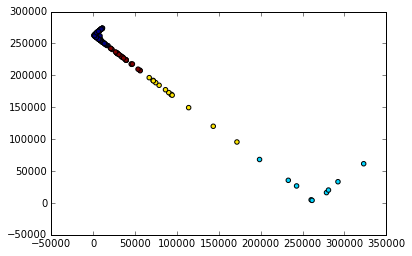

In [18]:
plt.scatter(distances[:,0], distances[:,1], c=label)

# K-means Clustering